<a href="https://colab.research.google.com/github/rpaulos/CCADMACL_EXERCISES_COM232/blob/main/Exercise3b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3B

In this exercise, you will explore how the DBSCAN clustering algorithm identifies dense groups and outliers in the Pokémon statistics dataset. You will analyze the dataset, scale features, determine DBSCAN parameters, run DBSCAN, and interpret the clustering results.

In [73]:
import kagglehub
import os
import pandas as pd

In [74]:
# Download latest version
path = kagglehub.dataset_download("abcsds/pokemon")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path to dataset files: /kaggle/input/pokemon


In [75]:
if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

True


## 1. Load the Dataset (8 pts)

Load the Pokémon dataset into a pandas DataFrame.

Show the first five rows (3 pts)

In [76]:
# put your answer here
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False



How many Pokémon are in the dataset? (2 pts)


In [77]:
# put your answer here
df.shape

(800, 13)


List all columns available (3 pts)

In [78]:
# put your answer here
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

## 2: Select Features & Clean the Data (8 pts)

Select the numeric features needed for clustering (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed).

How many rows remain after selecting these features? (3 pts)

In [79]:
# put your answer here
df = df[['Name', 'Legendary', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']]

df_selected_features = pd.DataFrame()

df_selected_features['Atk'] = (
    df['Attack'] / df['Attack'].mean() +
    df['Sp. Atk'] / df['Sp. Atk'].mean()
)

df_selected_features['Def'] = (
    df['Defense'] / df['Defense'].mean() +
    df['Sp. Def'] / df['Sp. Def'].mean()
)

df_selected_features['HP'] = (
    df['HP']
)

df_selected_features.head()
# df = df[['Attack', 'Defense', 'HP']]

# df.shape

,Atk,Def,HP
0,1.512855,1.567576,45
1,1.883397,1.965785,60
2,2.411207,2.514786,80
3,2.941167,3.334634,80
4,1.482167,1.277707,39


Are there any missing values? (2 pts)

In [80]:
# put your answer here
df.isna().sum()

,0
Name,0
Legendary,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0
Speed,0
Total,0


3d Scatterplot

In [81]:
import plotly.express as px

fig = px.scatter_3d(df_selected_features, x='Atk', y='Def', z='HP')
fig.show()

# 3. Scale the Features (10 pts)

Apply StandardScaler to the selected features.

Show the transformed feature sample (e.g., first 5 rows) (10 pts)


In [82]:
# put your answer here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_selected_features = scaler.fit_transform(df_selected_features)

df_selected_features = pd.DataFrame(df_selected_features, columns=['Atk', 'Def', 'HP'])

df_selected_features.head(5)

,Atk,Def,HP
0,-0.677884,-0.614948,-0.950626
1,-0.162258,-0.048657,-0.362822
2,0.572214,0.732076,0.420917
3,1.309677,1.897980,0.420917
4,-0.720589,-1.027172,-1.185748


In [83]:
fig = px.scatter_3d(df_selected_features, x='Atk', y='Def', z='HP')
fig.show()

## 4. Determine a Suitable eps Value (10 pts)

Using k = 4:
Compute the distance to the 4th nearest neighbor for each Pokémon (6 pts)

In [84]:
# put your answer here
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=4).fit(df_selected_features)
distances, indices = knn.kneighbors(df_selected_features)

What is your chosen epsilon based on the "elbow"? (2 pts)

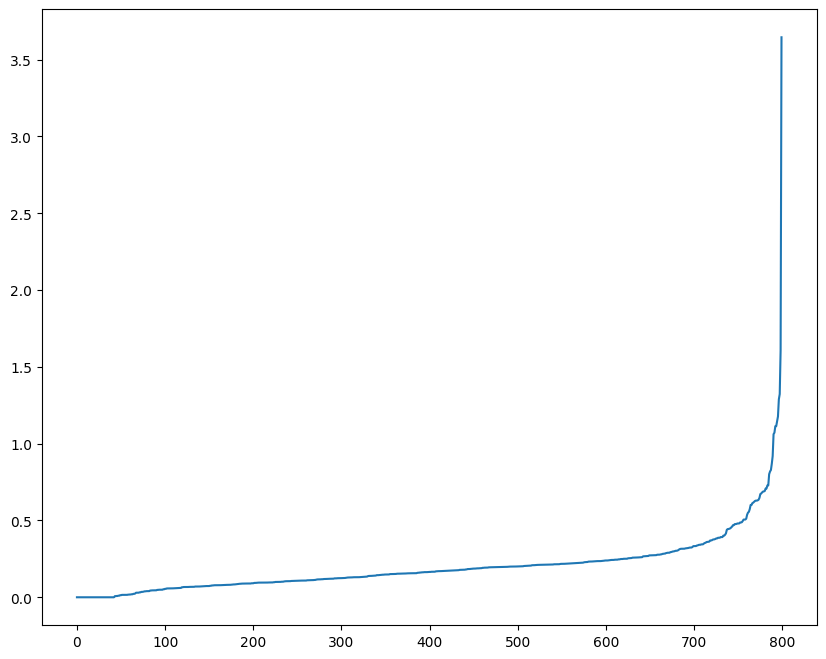

In [85]:
# put your answer here
import numpy as np
import matplotlib.pyplot as plt

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 8))
plt.plot(distances)

In [86]:
min_samples = range(3, 5)
epsilon = np.arange(0.5, 1.0, 0.1)
epsilon

array([0.5, 0.6, 0.7, 0.8, 0.9])

In [87]:
# put your answer here
from sklearn.cluster import DBSCAN
from sklearn import metrics

output = []

for ms in min_samples:
    for e in epsilon:
      labels = DBSCAN(min_samples=ms, eps=e).fit(df_selected_features).labels_
      score = metrics.silhouette_score(df_selected_features, labels)
      output.append([ms, e, score])

In [88]:
min_samples, eps, score = sorted(output, key=lambda x: x[-1])[-1]
print(f"Best silhouette_score: {score}")
print(f"min_samples: {min_samples}")
print(f"eps: {eps}")

Best silhouette_score: 0.5325632988695667
min_samples: 3
eps: 0.8999999999999999


One-sentence explanation of your reasoning (2 pts)

In [89]:
# put your answer here

## 5. Run DBSCAN (10 points)

Run DBSCAN using your chosen eps and min_samples


How many clusters did DBSCAN find? (4 pts)

In [90]:
# put your answer here
ep = eps
dbscan = DBSCAN(eps=ep).fit(df_selected_features)
labels = dbscan.labels_

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
silhouette_score = metrics.silhouette_score(df_selected_features, labels)

print(f"Number of clusters: {n_clusters}")

Number of clusters: 1


How many Pokémon were labeled as noise? (4 pts)

In [91]:
# put your answer here
print(f'Number of noise: {n_noise}')

Number of noise: 21


Show the unique labels output by DBSCAN (2 pts)

In [92]:
# put your answer here
print(f'Unique labels: {set(labels)}')

Unique labels: {np.int64(0), np.int64(-1)}


In [93]:
df_selected_features['labels'] = labels
fig = px.scatter_3d(df_selected_features, x='Atk', y='Def', z='HP', color=labels)
fig.show()

## 6. Attach Cluster Labels to the Original Dataset (7 points)

Add the cluster labels back to the original DataFrame (3 pts)

In [94]:
# put your answer here
df['cluster'] = labels

Show the first 10 rows including the cluster label (4 pts)

In [95]:
# put your answer here
df.head(10)

,Name,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,cluster
0,Bulbasaur,False,45,49,49,65,65,45,318,0
1,Ivysaur,False,60,62,63,80,80,60,405,0
2,Venusaur,False,80,82,83,100,100,80,525,0
3,VenusaurMega Venusaur,False,80,100,123,122,120,80,625,0
4,Charmander,False,39,52,43,60,50,65,309,0
5,Charmeleon,False,58,64,58,80,65,80,405,0
6,Charizard,False,78,84,78,109,85,100,534,0
7,CharizardMega Charizard X,False,78,130,111,130,85,100,634,0
8,CharizardMega Charizard Y,False,78,104,78,159,115,100,634,0
9,Squirtle,False,44,48,65,50,64,43,314,0


## 7. Explore the Clusters (12 points)

For each cluster:


How many Pokémon does it contain? (4 pts)

In [96]:
num_pokemon_per_cluster = df['cluster'].value_counts()
num_pokemon_per_cluster

,count
cluster,
0,779
-1,21


What are the average Attack, Defense, and Speed? (4 pts)


In [97]:
# put your answer here
df_cluster0 = df[df['cluster'] == 0]
df_cluster0[['Attack', 'Defense', 'Speed']].mean()


,0
Attack,78.504493
Defense,73.745828
Speed,68.210526


Compare the clusters: What differences do you notice? (4 pts)

It cannot be compared to other clusters because there is only one cluster formed by DBSCAN

## 8. Identify Outliers (10 points)

List all Pokémon labeled as noise (cluster = -1) (4 pts)

In [98]:
# put your answer here
df_cluster1 = df[df['cluster'] == -1]
df_cluster1

,Name,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,cluster
44,Jigglypuff,False,115,45,20,45,25,20,270,-1
121,Chansey,False,250,5,5,35,105,50,450,-1
155,Snorlax,False,160,110,65,65,110,30,540,-1
217,Wobbuffet,False,190,33,58,33,58,33,405,-1
230,Shuckle,False,20,10,230,10,230,5,505,-1
261,Blissey,False,255,10,10,75,135,55,540,-1
313,Slaking,False,150,160,100,95,65,100,670,-1
351,Wailord,False,170,90,45,90,45,60,500,-1
394,Wynaut,False,95,23,48,23,48,23,260,-1
422,KyogrePrimal Kyogre,True,100,150,90,180,160,90,770,-1


Are many of them legendary? (3 pts)

In [99]:
# put your answer here
df_legendaries = df_cluster1[df_cluster1['Legendary'] == True]
df_legendaries

,Name,Legendary,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total,cluster
422,KyogrePrimal Kyogre,True,100,150,90,180,160,90,770,-1
424,GroudonPrimal Groudon,True,100,180,160,150,90,90,770,-1
426,RayquazaMega Rayquaza,True,105,180,100,180,100,115,780,-1
428,DeoxysNormal Forme,True,50,150,50,150,50,150,600,-1
429,DeoxysAttack Forme,True,50,180,20,180,20,150,600,-1
544,GiratinaAltered Forme,True,150,100,120,100,120,90,680,-1
545,GiratinaOrigin Forme,True,150,120,100,120,100,90,680,-1
795,Diancie,True,50,100,150,100,150,50,600,-1
796,DiancieMega Diancie,True,50,160,110,160,110,110,700,-1
798,HoopaHoopa Unbound,True,80,160,60,170,130,80,680,-1


Explain why DBSCAN might classify them as outliers (3 pts)

In the Pokemon lore, legendaries are classified as Pokemons that are stronger than the average pokemon. These pokemons have an overall higher base stats compared to those who aren't classified as legendary pokemons.

## 9. Interpret the Clustering Results (25 points)
Write a short interpretation (4–6 sentences).
Discuss:


What types of Pokémon grouped together (5 pts)

Based on the DBSCAN results, the algorithm identified only a single large cluster of Pokémon along with a small number of outliers. The main cluster contains 785 Pokémons, which includes (This takes into consideration the different types in the Pokémon universe lore wise)the non-legendaries, pseudo-legendaries, mythicals, and true legendaries. The outlier group also contains a similar mix of Pokémon types, meaning DBSCAN was not able to separate or distinguish legendary Pokémon from the rest based on the selected features. This could possibly be because the base stats of the different Pokémon classifciations do not contain a significant gap between them.

Whether the clusters make intuitive sense (10 pts)

The clusters of Pokémons do not necessarily make sense in seperating their ranking/tier. This is because out of the 800 Pokémons in the dataset, only one cluster could be found by the DBSCAN algorithm. This means that there is no clear seperation between the different kinds of Pokémons (Non-legendaries, mythical, pseudo-legendaries, legendaries, etc.) which makes it harder for the DBSCAN algorithm to generate the desired results. DBSCAN is a density based algorithm which means it looks for areas with high concentration of points or in this case Pokémons. Because the points overlap, it does not form well seperated groups or clusters.



What the noise points reveal about DBSCAN (5 pts)


The noise represents the outliers identified by the DBSCAN algorithm. These are the points that do not belong to any clusters because they lack the number of nearby neighbours. In the context of the Pokémon dataset, the noise are the pokemons with the stats that are scatter far away from the main cluster which is confirmed by the help of the 3d visualization. As said before in the answer above, it just tells us how DBSCAN has more to do with clustering based on the density.

What stat patterns you discovered (5 pts)

Its fair to assume that the initial assumption someone might have when given this task is that there would be clear seperatrion or clustering between the different types of Pokémons (Non-legendaries and legendaries). However, with some analyzation, there are no specific pattern in the stats the seperates the different Pokémons. Legendary Pokémons do tend to have higher overall base stats but this is also true for other types of Pokémon such as pseudo-legendary Pokémon which were not reflected in the dataset. This is because game wise, the stats of Pokémons do not necessarily follow the rule that legendary equates to stronger, faster, or better overall.
